# 07 Practise Problems  
## CLASS MATERIAL

# Download the new class notes.
__Navigate to the directory where your files are stored.__

__Update the course notes by downloading the changes__




##### Windows
Search for __Git Bash__ in the programs menu.

Select __Git Bash__, a terminal will open.

Use `cd` to navigate to *inside* the __ILAS_PyEng2019__ repository you downloaded. 

Run the command:
>`./automerge`



##### Mac
Open a terminal. 

Use `cd` to navigate to *inside* the __ILAS_PyEng2019__ repository you downloaded. 

Run the command:
>`sudo ./automerge`

Enter your password when prompted. 

### Lesson Goal

This lesson is a series of practise problems to test your understanding before we move onto the __Applications of Programming__ section of the course.

Submit your answers to each question by emailing them to:
<br>philamore.hemma.5s@kyoto-u.ac.jp


### Fundamental programming concepts
 
To solve the problems you must apply what you have learnt knowledge from the __Fundamentals of Programming__ section of the course.

<a id='Differentiation'></a>
# 1. Plotting Data

Import the data from the file `temperature_data.csv`.

The file contains the mean temperature (°C) of London, Philadelphia, and Hong Kong recorded during some months of the year.

Plot the temperature for each city against the number of the month (starting with 1 for January) as a single plot.

Label the axes. 

Add a figure legend showing which line on the grpah represents London, Philadelphia, and Hong Kong respectively.

Interpolate to estimate the temperature data for the missing months for each city.  

Plot the interpolated data. 

*Extension : Change the x-axis tick labels from the number of the month to the name of the month (e.g. change 1 to January)*

[['' 'Jan' 'Mar' 'May' 'Jul' 'Sep' 'Nov' 'Dec']
 ['London' '3.1' '6.2' '13.1' '17.9' '14.5' '6.7' '3.7']
 ['Philadelphia' '-1' '4' '16' '24' '19' '7' '2']
 ['Hong_Kong' '-3.5' '7' '20.5' '27' '20.5' '4.5' '-1']]


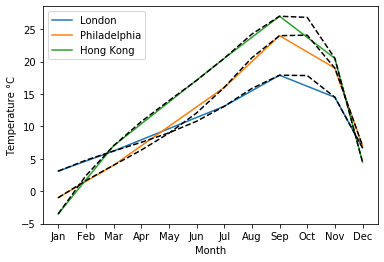

In [42]:
# Exercise 1 : Plotting Data
# Example Solution 

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d

# import data
data = np.loadtxt('sample_data/temperature_data.csv', delimiter=",", dtype=str)
print(data)

# we can see from the result that we should skip row one and import columns 1-12
data = np.loadtxt('sample_data/temperature_data.csv', 
                  delimiter=",", 
                  skiprows=1, 
                  usecols=(tuple(range(1,7))))

# months for which we have data
months = [1, 3, 7, 9, 11, 12]

# plot data
plt.plot(months, data[0], label="London");
plt.plot(months, data[1], label="Philadelphia");
plt.plot(months, data[2], label="Hong Kong");
#plt.xlim(months[0], months[-1])

# label axes and add legend
plt.xlabel('Month')
plt.ylabel('Temperature °C')
plt.xticks(range(1,13), range(1,13))
plt.legend()

all_months = np.arange(1, 13, 1)

# interpolate
for i in range(3):
    interp = interp1d(months, data[i], 'cubic') # type = ‘linear’, ‘nearest’, ‘zero’, ‘cubic’...
    plt.plot(all_months, interp(all_months), 'k--');

# relabel x ticks
plt.xticks(range(1,13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'));

<a id='SymbolicMathematics'></a>
# 2. Curve Fitting
Import the data from the file `sample_data/air_temperature.dat`.

The file contains the air temperature (°C) recorded every 2 hours during a 24 hour period.

Plot the data as a scatter plot and label the axes. 

Look at the shape of the plot. Based on your observation, approximate a continuous function that describes the data by curve fitting. 

Plot the function as a line on the same graph as the original data. 

Calculate the root mean sqaured error between your fitted function and the original data. 

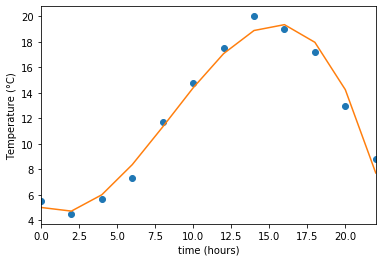

In [43]:
# Exercise 2 : Curve Fitting
# Example Solution 

# import data
data = np.loadtxt('sample_data/air_temperature.dat', delimiter=",")

time = np.array(range(0, 24, 2))

# plot data as scatter plot
plt.plot(time, data, 'o')
plt.xlim(time[0], time[-1])

# label axes
plt.xlabel('time (hours)')
plt.ylabel('Temperature (°C)')

b = np.polyfit(time, data, 3) # third order polynolmial

data_fit = np.poly1d(b)(time)

plt.plot(time, data_fit)

<a id='Symbolic_Differentiation'></a>
# 3. Functions and Libraries
Write a Python function for the following function:

$f(x)=e^{\frac{-K x}{50}}\sin(x)$

The function should:
- take `x` and `K` as input arguments
- return the value of the function
- have a dcoumentation string 

Store your function in a seperate file called `my_functions` and import it to your main program. 

In your main program, import the data from the file `sample_data/air_temperature.dat`.

For each data point, make a plot of `f` vs. `x` where:

`K` = the value of the imported data point 

`x` = integers in the range [0 , 15]  

Add a legend. 

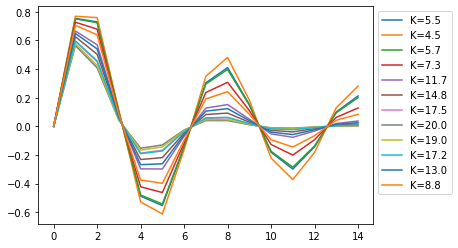

In [86]:
# Exercise 3 : Functions and Libraries
# Example Solution 

data = np.loadtxt('sample_data/air_temperature.dat', delimiter=",")

x = range(15)

def test(x, K):
    '''
    Test function to import from your location of choice
    '''
    return np.exp(-K * x /50) * np.sin(x)

for d in data:
    plt.plot(x, test(x, d), label=f'K={d}')

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

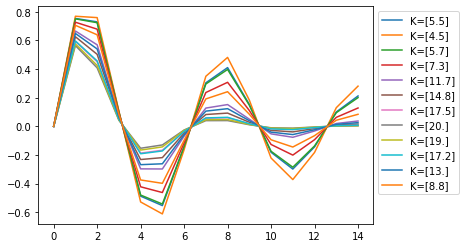

In [87]:
# Exercise 3 : Functions and Libraries
# Example Solution : Broadcasting

from sample_data.my_functions.my_functions import *

K = np.loadtxt('sample_data/air_temperature.dat', delimiter=",")
K = data.reshape(12, 1)
x = np.array(range(15))

def test(x, K):
    '''
    Test function to import from your location of choice
    '''
    return np.exp(-K * x /50) * np.sin(x)

f = test(x, K)

for i in range(f.shape[0]):
    plt.plot(x, f[i], label=f'K={K[i]}')
    
    
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

# 4. Systems of Equations  

The following four measurements of the quantity $g$ were made at time $t_0, t_1, t_2, t_3$ : 

$(t_0,g_0)=(0,3)$

$(t_1,g1)=(0.25,1)$

$(t_2,g_2)=(0.5,-3)$

$(t_3,g_3)=(0.75,1)$. 

The measurements lie on a wave function that may be expresssed as: 

$g = a\cos(\pi t) + b\cos(2\pi t) + c\cos(3\pi t) + d\cos(4\pi t)$

where $a$, $b$, $c$, and $d$ are constants. 

Solve for the four constants by arranging them as a system of four linear equations.

Plot of the wave for $t$ in the range [0, 1].

Indicate the four measurements by ploting them as dots.

a,b,c,d:  [ 1.  2.  1. -1.]


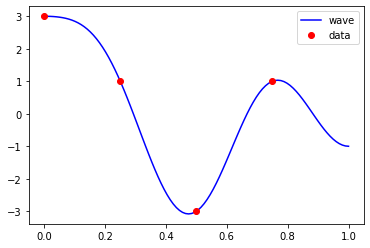

In [46]:
# Exercise 4 : Systems of Equations
# Example Solution 

#data
t = np.array([0, 0.25, 0.5, 0.75])
g = np.array([ 3, 1, -3, 1])

# array to hold data
lhs = np.zeros((4, 4))
rhs = np.zeros(4)

# populate arrays
for i in range(4):
    lhs[i] = np.cos(1 * np.pi * t[i]), \
             np.cos(2 * np.pi * t[i]), \
             np.cos(3 * np.pi * t[i]), \
             np.cos(4 * np.pi * t[i])  # Store one row at a time
    
    
    rhs[i] = g[i]

# solve system of equations    
sol = np.linalg.solve(lhs, rhs)

# print value of coefficients
print('a,b,c,d: ',sol)

# range of values for t
t_all = np.linspace(0, 1, 100)  

# g for all t
g_all = sol[0] * np.cos(1 * np.pi * t_all) + \
        sol[1] * np.cos(2 * np.pi * t_all) + \
        sol[2] * np.cos(3 * np.pi * t_all) + \
        sol[3] * np.cos(4 * np.pi * t_all)

# plot wave function
plt.plot(t_all, g_all, 'b', label='wave')
# plot data points
plt.plot(t, g, 'ro', label='data')
plt.legend(loc='best');

<a id='Symbolic_Differentiation'></a>
# 5. Numerical Integration 
 
__(a)__ *Analytically* show that the integral of the function <br> $f(x)=\text{e}^{-x}$ <br>  for $x$ in the range [1, 5] is equal to $-\text{e}^{-5} + \text{e}^{-1}$.  

<br>

<br>

__(b)__ Show that the following integral is equal to 0.218236 (6 s.f.):

$$\int_1^5 \frac{\text{e}^{-x}}{x}\text{d}x$$  

Perform the integration numerically. 

In [47]:
# Exercise 5 : Numerical Integration 
# Example Solution 
from scipy.integrate import quad

# a) Analytical solution
import sympy as sp
from sympy import symbols, integrate

x = symbols('x')

f = sp.exp(-x)

print(integrate(f, (x, 1, 5))) # definite integral from x=0..1


# b) numerical solution 
# first create a function to describe the integrand
def integrand(x):
    return np.exp(-x) / x

# create two variables to store the integral and the error
ans, err = quad(integrand, 1, 5)

print(ans)


-exp(-5) + exp(-1)
0.21823563880424607


<a id='Symbolic_Differentiation'></a>
# 6. Predator Prey  
Also known as Lotka-Volterra equations, the predator-prey equations are a pair of first-order non-linear ordinary differential equations. 

They represent a simplified model of the change in populations of two or more species which interact via predation.  

Let $x$ represent the population of predators and  $y$  represent the population of prey.

The rate of change of each population can be represented by two first order differential equations. 

$$\frac{dx}{dt} = x (a - by)$$ 

$$\frac{dy}{dt} = y (dx - c)$$ 

$a ,  b ,  c$  and  $d$  are parameters, which are assumed to be positive.

$a$ : growth of prey population <br>
$b$ : decay of prey population due to predation<br>
$c$ : growth of predator population <br>
$d$ : decay of predator population due to natural death <br>

Let $a = b = c = d = 1$

__(a)__ Find the numerical solution to the system of equations for $x$ and $y$, for time, $t$, in the range [0, 12].

__(b)__ Plot $x$ and $y$, against $t$ =  range [0, 12].

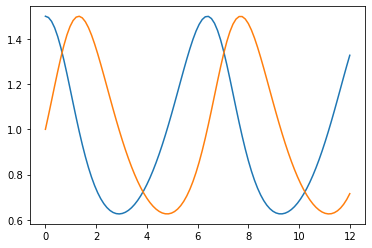

In [49]:
# Exercise 6 : Predator Prey  
# Example Solution

# Part A

# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

# constants 
a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    """
    P is a vector such that P[0] = x and P[1] = y.
    Returns [x', y']
    """  
    return [ P[0]*(a - b*P[1]), 
            -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100) # the value(s) of t at which to evaluate P
P0 = [1.5, 1.0]              # the initial value of each population

# odeint returns solution for x,y at each value of t
Ps = odeint(dP_dt, P0, ts)

prey = Ps[:,0]       # column 0 = solution for x
predators = Ps[:,1]  # column 1 = solution for y

plt.plot(ts, prey)
plt.plot(ts, predators)